In [1581]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as plt
import warnings
import plotly.figure_factory as ff
warnings.filterwarnings("ignore")

data = pd.read_csv('drake_discography_data.csv')
data = data.rename(columns={' Plays ': 'Plays'})

In [1582]:
data['Plays'] = data['Plays'].str.replace(',','').astype(int)

In [1004]:
data.head()

,Album,Release Date,Release Year,Release Month,Release Month (Name),Release Day,Release Day (Name),Album ID,Number of Album Songs,Song Name,Plays,Artist,Song ID,Track Duration,Track Duration (Minutes),Track Duration (Seconds),Track Number,Number of Artists,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artist 1,Artist 2,Artist 3
0,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Rich Flex,463655324,"Drake,21 Savage",1bDbXMyjaUIooNwFE9wn0N,3:59,3,59,1,2,0.561,0.520,11,-9.342,0.244,0.05030,0.0,0.3550,0.424,153.150,Drake,21 Savage,NaN
1,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Major Distribution,134609385,"Drake,21 Savage",46s57QULU02Voy0Kup6UEb,2:50,2,50,2,2,0.908,0.546,8,-10.491,0.323,0.01270,0.0,0.0707,0.225,131.016,Drake,21 Savage,NaN
2,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,On BS,137344442,"Drake,21 Savage",34tz0eDhGuFErIuW3q4mPX,4:21,4,21,3,2,0.841,0.358,9,-8.368,0.591,0.02010,0.0,0.3900,0.329,158.014,Drake,21 Savage,NaN
3,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,BackOutsideBoyz,80148026,Drake,0wshkEEcJUQU33RSRBb5dv,2:32,2,32,4,1,0.849,0.433,5,-8.434,0.316,0.04070,0.0,0.3880,0.395,142.110,Drake,NaN,NaN
4,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Privileged Rappers,92548320,"Drake,21 Savage",7l2nxyx7IkBX5orhkALg0V,2:40,2,40,5,2,0.934,0.614,5,-7.384,0.198,0.00274,0.0,0.1230,0.616,144.045,Drake,21 Savage,NaN


In [1005]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Album Popularity

How does each album perform to each other?

In [589]:
q1 = pysqldf("SELECT Album, [Release Year], SUM(Plays) AS [Total Streams] FROM data GROUP BY 1 ORDER BY 3 DESC")


In [997]:
q1

,Album,Release Year,Total Streams
0,Scorpion,2018,8913490269
1,Views,2016,8334444613
2,More Life,2017,6054100881
3,Take Care (Deluxe),2011,3964211685
4,Certified Lover Boy,2021,3747464183
5,Nothing Was The Same (Deluxe),2013,3440996561
6,If You're Reading This It's Too Late,2015,2999966802
7,Dark Lane Demo Tapes,2020,2531054437
8,What A Time To Be Alive,2015,1863883101
9,Her Loss,2022,1772680150


In [591]:
q1['Total Streams']

0     8913490269
1     8334444613
2     6054100881
3     3964211685
4     3747464183
5     3440996561
6     2999966802
7     2531054437
8     1863883101
9     1772680150
10    1317716452
11     991566681
12     944926700
13     715425405
Name: Total Streams, dtype: int64

In [841]:
q1_ig = [
  "images/scorpion.png",
  "images/views.png",
  "images/morelife.png",
  "images/takecare.png",
  "images/certifiedloverboy.png",
  "images/nothingwasthesame.png",
  "images/ifyourereadingthisitstoolate.png",
  "images/darklanedemotapes.png",
  "images/whatatimetobealive.png",
  "images/herloss.png",
  "images/hnm.png",
  "images/tml.png",
  "images/sofargone.png",
  "images/carepackage.png"
]

In [995]:
fig1 = px.bar(q1, x=q1['Album'].to_list(), y=q1['Total Streams'].to_list(), title="Drake Albums by Popularity (2023)")
fig1.update_layout(title=dict(x=0.15, y=0.97, font=dict(size=24, family='Georgia')),width=800, height=990, barmode='group', xaxis_tickangle=-45, paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                   xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Geogria'),showgrid=True), xaxis_title=None, yaxis_title="Total Streams (Billions)")
fig1.update_traces(marker_color='#1ed760', marker_line=dict(width=1, color='grey'))

bar_heights = q1['Total Streams'].to_list()

# Add cover album above bar
for i, (height, path) in enumerate(zip(bar_heights, q1_ig)):
    fig1.add_layout_image(
        dict(
            source=path,
            xref="x",
            yref="y",
            x=i,
            y=height + 30000000,
            sizex=5,
            sizey=525000000,
            xanchor="center",
            yanchor="bottom"
        )
    )

#Spotify
fig1.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.08,
        y=1.135,
        sizex=0.11,
        sizey=0.11,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig1.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.235,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='Black', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)
fig1.show()

Not surprising to see Scorpion and Views taking the top 2 most popular Drake albums. Some of his most popular tracks appear in these albums, from God's Plan, In My Feelings, One Dance and Hotline Bling. Do you remember where you were when these songs released? 

Part of the reason why Drake has sustained mainstream status in the music industry is thanks to catchy, iconic hits like these songs. Whether by lyrics, memes, or music videos, his relatability to the pop culture scene is uncanny. Staying relevant for this long is no easy feat, as most have just a few hits before being forgotten by most.

However, it's worthy to note some of his worst peforming albums. His most recent albums, Her Loss and Honestly, Nevermind just released last year. It would immature to take this graph at face value without understanding context. Give these albums time and they will surprise some of his other work. Especially Her Loss, which is without a doubt been given positive feedback by most of his audience.

Speaking of popularity, what are his most popular songs?

In [1009]:
q2 = pysqldf("SELECT [Song Name], Plays, Album, [Release Year] FROM data ORDER BY Plays DESC LIMIT 10")


,Song Name,Plays,Album,Release Year
0,One Dance,2607846326,Views,2016
1,God's Plan,2169557886,Scorpion,2018
2,In My Feelings,1290100065,Scorpion,2018
3,Passionfruit,1286403608,More Life,2017
4,Hotline Bling,1182189657,Views,2016
5,Nice For What,1113016827,Scorpion,2018
6,Nonstop,965929333,Scorpion,2018
7,Toosie Slide,961536663,Dark Lane Demo Tapes,2020
8,Too Good,957800485,Views,2016
9,Fake Love,899932461,More Life,2017


In [1017]:
q2 = q2.sort_values(by='Plays', ascending=False)

In [1051]:
fig2 = px.bar(q2, x=q2['Song Name'].to_list(), y=q2['Plays'].to_list(), title="Top 10 Most Popular Drake Songs")
fig2.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700, barmode='group', xaxis_tickangle=-45,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Georgia'), showgrid=True),
                  xaxis_title=None, yaxis_title="Total Streams (Billions)")
fig2.update_traces(marker_color='#1ed760', marker_line=dict(width=1, color='grey'))


#Spotify
fig2.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.09,
        y=1.165,
        sizex=0.12,
        sizey=0.12,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig2.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.165,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=14, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

At first glance, I'm actually surprised One Dance is his most popular song. I thought it would be God's Plan because of how it exploded across streaming sites in addition to it's music video that was released.

It's also interesting that the majority of songs in this list are either released as a Single or EP(extended play). To my knowledge, God's Plan (Scary Hours), One Dance, Hotline Bling, and Toosie Slide are considered a Single/EP. It's almost as if Drake knew these tracks would be a hit!

Unfortunately, I couldn't seem to have the chart color-coded without having it grouped by album. Regardless, here it is:

In [1151]:
fig2a = px.bar(q2, x=q2['Song Name'].to_list(), y=q2['Plays'].to_list(), title="Drake's Most Popular Songs", color=q2['Album'])
fig2a.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700, barmode='group', xaxis_tickangle=-45,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Georgia'), showgrid=True),
                  xaxis_title=None, yaxis_title="Total Streams (Billions)")
fig2a.update_traces(marker_line=dict(width=1, color='grey'))


#Spotify
fig2a.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.12,
        y=1.165,
        sizex=0.15,
        sizey=0.15,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig2a.add_annotation(
    x=1.45,  # x-coordinate of the annotation
    y=-0.165,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

As expected, his most popular tracks are also featured in his most popular albums. Toosie Slide is the exception, as this was a single that took the music industry by storm with the catchy, Tik-Tok friendly track. During the COVID-19 lockdown, Drake delivered with a fun, danceable track. He also produced a music video, showcasing his _ridiculuously_ beautiful Canada home estate.

__link music video here__

Here's the list with his most popular song on each album:

In [1062]:
q3 = pysqldf("SELECT Album, [Song Name], MAX(Plays) AS Streams FROM data GROUP BY Album ORDER BY MAX(Plays) DESC")

q3

,Album,Song Name,Streams
0,Views,One Dance,2607846326
1,Scorpion,God's Plan,2169557886
2,More Life,Passionfruit,1286403608
3,Dark Lane Demo Tapes,Toosie Slide,961536663
4,Nothing Was The Same (Deluxe),"Hold On, We're Going Home",820185400
5,What A Time To Be Alive,Jumpman,765718064
6,Certified Lover Boy,Knife Talk (with 21 Savage ft. Project Pat),545288250
7,Take Care (Deluxe),Take Care,511423163
8,"Honestly, Nevermind",Jimmy Cooks (feat. 21 Savage),508089150
9,So Far Gone,Best I Ever Had,496427648


#  Impact of featured artists on song popularity

Similar artists such as Travis Scott, Kanye West, 21 Savage, and Rihanna have appeared on Aubrey's discography. Featuring other artists on albums can prove effective in joining fanbases, providing an alternative sound to the album, and increase hype. Personally, I try to listen to songs with features first before exploring solos whenever Drake drops an album. They tend to be the most listened to.

How do Drake songs perform when comparing between solos and songs with features?

In [1104]:
q4_query = '''SELECT 
    CAST(COUNT(CASE WHEN "Artist 2" IS NULL THEN 1 END) AS DECIMAL(10,2)) AS Solo, 
    CAST(COUNT(CASE WHEN "Artist 2" IS NOT NULL THEN 1 END) AS DECIMAL(10,2)) AS Collab 
FROM data'''

q4 = pysqldf(q4_query)

In [1109]:
totals = q4.sum().sum()

normalized_q4 = q4 / totals 


normalized_q4 = normalized_q4.mul(100)

,Solo,Collab
0,60.90535,39.09465


In [1164]:
fig4 = px.bar(x=['Solo', 'Collab'], y=[normalized_q4.Solo.values[0] * 100.0,normalized_q4.Collab.values[0] * 100.0], title="Album Song Type Distribution")
fig4.update_layout(xaxis_title='Song Type', yaxis_title='Percentage', width=700, height=600,
                    title=dict(x=0.14, y=0.91, font=dict(size=21, family='Georgia')),
                    paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                    xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Georgia'), showgrid=True))

fig4.update_traces(marker_line=dict(width=1, color='#1F0202'), marker_color=['#6da0f2','#b37289'])
fig4.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig4.update_layout(yaxis_ticksuffix = '%')

#Spotify
fig4.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.11,
        y=1.165,
        sizex=0.14,
        sizey=0.14,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig4.add_annotation(
    x=1.12,  # x-coordinate of the annotation
    y=-0.175,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig4.show()

This was actually surprising to see! Drake tends to feature on artists on his album's songs. Compared to another musician such as J. Cole, his likeness was built off albums that featured his voice and  his voice only. His most popular album, Forest Hills Drive went platinum with no features!


In [1167]:
q5_query =  '''SELECT SUM(CASE WHEN [Artist 2] IS NULL THEN Plays END) AS [Total Solo Song Streams],
                SUM(CASE WHEN [Artist 2] IS NOT NULL THEN Plays END) AS [Total Collab Song Streams]
                FROM data'''

q5 = pysqldf(q5_query)

q5

,Total Solo Song Streams,Total Collab Song Streams
0,28382783253,19209144667


In [1174]:
fig5 = px.bar(x=['Solo', 'Collab'], y=[q5['Total Solo Song Streams'].iloc[0], q5['Total Collab Song Streams'].iloc[0]], title="Total Streams By Song Type")
fig5.update_layout(xaxis_title=None, yaxis_title='Streams (in Billions)', width=700, height=600,
                    title=dict(x=0.14, y=0.91, font=dict(size=21, family='Georgia')),
                    paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                    xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Georgia'), showgrid=True))

fig5.update_traces(marker_line=dict(width=1, color='#1F0202'), marker_color=['#6da0f2','#b37289'])
fig5.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')

#Spotify
fig5.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.11,
        y=1.165,
        sizex=0.14,
        sizey=0.14,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig5.add_annotation(
    x=1.12,  # x-coordinate of the annotation
    y=-0.175,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig5.show()

Songs featuring just Drake surpass total streams featuring one or more artists on album songs!

But let's get more granular than this. Let's see how streams perform for each of his albums.

In [1194]:
q6_query = '''SELECT Album,
  AVG(CASE WHEN [Artist 2] IS NULL THEN Plays ELSE NULL END) AS [Average Solo Track Streams],
  AVG(CASE WHEN [Artist 2] IS NOT NULL THEN Plays ELSE NULL END) AS [Average Collab Track Streams]
FROM data
GROUP BY Album
'''


q6 = pysqldf(q6_query)

In [1342]:
fig7 = px.bar(q6, x='Album', y=['Average Solo Track Streams', 'Average Collab Track Streams'], title="Song Performance By Type", 
              barmode='group')

fig7.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=900, height=900, xaxis_tickangle=-45,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Georgia'), showgrid=True),
                  xaxis_title=None, yaxis_title="Total Streams (Millions)",
                  bargap=0.6, legend_title = None)
fig7.update_traces(marker_line=dict(width=1, color='grey'))

fig7.update_xaxes(tickfont=dict(size=11))

#Spotify
fig7.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.135,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig7.add_annotation(
    x=1.40,  # x-coordinate of the annotation
    y=-0.24,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig7.show()

Across his 14 albums, 8 have a higher number of streams for collaboration tracks than solo's. 

Honestly, Nevermind and Views far exceed average streams for collaboration tracks. This is because Jimmy Cooks from Honestly, Nevermind and One Dance from Views were smash hits from these respective albums. Jimmy Cooks is actually the only track featuring another artist (21 Savage) on Honestly, Nevermind.

Further analysis would be to normalize this data by the number of solos and collab songs.

Speaking of artists such as 21 Savage, let's examine what artists Drake likes to feature in his songs:

In [1371]:
q7_query = '''WITH CTE AS (
    SELECT [Artist 2] AS artist
    FROM data
    UNION  ALL
    SELECT [Artist 3] AS artist
    FROM data
    )
    SELECT artist, [Number of Features]
    FROM (
        SELECT artist, COUNT(*) AS [Number of Features], ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) AS rn
        FROM CTE
        GROUP BY artist
    ) subq
    WHERE rn > 1
    ORDER BY [Number of Features] DESC'''

q7 = pysqldf(q7_query)

q7

,artist,Number of Features
0,Future,13
1,21 Savage,13
2,Lil Wayne,10
3,Young Thug,4
4,Travis Scott,4
5,PARTYNEXTDOOR,4
6,JAY-Z,4
7,Rick Ross,3
8,Ty Dolla $ign,2
9,Sampha,2


As What A Time To Be Alive and Her Loss were considered collab albums, Future and 21 Savage taking the top spots for featured artists on Drake albums comes at no surprise. As Drake was coming onto the scene during the late 2000's, Lil Wayne is often labeled as Drake's mentor. 

As Drake once said in What's Next (Scary Hours 2 EP): 

"I'm movin' way too humble

Weezy had handed it off, I still got no fumbles"

Lil Wayne's end to his dominance in the rap scene concluded with the passing of the torch to hungry, humble Drake who was otherwise only known for his appearances in Degrassi. Playing the character of Jimmy Brooks, Drake's rise to fame started out in T.V. Anyone else watched this show back in the day?


I was surprised that Kanye and The Weeknd only had one together with Drake, but PARTYNEXTDOOR has 4 songs? What happened to him?

Let's see the top 10 Drake songs that featured another artist:

In [1396]:
q8_query = '''WITH CTE AS
(SELECT [Artist 2], AVG(Plays) AS [Average Streams], COUNT(*) AS Num_Features, ROW_NUMBER() OVER(ORDER BY COUNT(*) DESC) AS row
FROM data
GROUP BY [Artist 2]
HAVING Num_Features > 1
ORDER BY Num_Features DESC
)
SELECT * FROM CTE
WHERE row > 1
ORDER BY [Average Streams] DESC
LIMIT 10'''

q8 = pysqldf(q8_query)

q8

,Artist 2,Average Streams,Num_Features,row
0,Rihanna,7.346118e+08,2,9
1,Majid Jordan,4.581599e+08,2,12
2,Travis Scott,3.107574e+08,2,7
3,2 Chainz,2.383941e+08,2,14
4,Nicki Minaj,1.977408e+08,2,11
5,21 Savage,1.975513e+08,13,3
6,Future,1.936222e+08,13,2
7,Sampha,1.584636e+08,2,8
8,Lil Wayne,1.512711e+08,7,4
9,Giggs,1.455247e+08,2,13


In [1397]:
artists_path = [
  "artists/rihanna.jpeg",
  "artists/majidjordan.jpeg",
  "artists/travis.jpeg",
  "artists/2chainz.jpeg",
  "artists/nickiminaj.jpeg",
  "artists/21savage.jpeg",
  "artists/future.jpeg",
  "artists/sampha.jpeg",
  "artists/lilwayne.jpeg",
  "artists/giggs.jpeg"]

In [1440]:
fig8 = px.bar(q8.sort_values('Average Streams', ascending=False), x='Artist 2', y='Average Streams', title="Most Popular Featured Artists By Average Streams", 
              barmode='group')

fig8.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=900, height=900, xaxis_tickangle=-45,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=False), yaxis=dict(title_font=dict(family='Georgia'), showgrid=True),
                  xaxis_title=None, yaxis_title="Streams (Millions)", legend_title = None)
fig8.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig8.update_xaxes(tickfont=dict(size=11))

# Add cover album above bar
for i, (height, path) in enumerate(zip(q8['Average Streams'].to_list(), artists_path)):
    fig8.add_layout_image(
        dict(
            source=path,
            xref="x",
            yref="y",
            x=i,
            y=height + 5000000,
            sizex=0.75,
            sizey=50000000,
            xanchor="center",
            yanchor="bottom"
        )
    )

#Spotify
fig8.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.135,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig8.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.1,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig8.show()

This graph can be misleading.

 Sure, Rihanna and Drake on a track is pop culture's dream, but Majid Jordan being Drake's second most popular featured artist by average streams? Nope. I call BS.

Turns out I was right! The reason why Majid Jordan is at #2 is because he is only featured on 2 songs with Drake. If the track is a banger, then this inflates the artist up the rankings. I can recall that one of the 2 tracks featuring Rihanna is Too Good from Views, which was one of the top tracks from the album. I could have set some arbitrary cutoff for this graph, but what I'd rather show from this visualization is the idea that data can be deceptive, and tuned to the author's narrative.

Nonetheless, it was cool to see 2 Chainz up there, along with Nicki Minaj, both of which I'm a follower of their music.

# Audio Feature Analysis

Let's now take a look at the audio feature data that Spotify offers as part of the their API. We're interested in seeing if there's any trends or changes to Drake's musical style. Artsits typically adapt in their career to stay fresh in the industry, and Spotify offers some audio features that might help us with this question.

The variables in question are -

**Energy**: A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


**Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Check out the full list of different audio features Spotify provides [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features)


**Note**: Drake did not release an album in 2012 and 2014, which explains the sharp changes in energy during this time frame

In [1492]:
eg = '''SELECT Album, [Release Year] FROM data GROUP BY 1 ORDER BY 2 ASC'''

print(pysqldf(eg))

                                   Album  Release Year
0                         Thank Me Later          2010
1                     Take Care (Deluxe)          2011
2          Nothing Was The Same (Deluxe)          2013
3   If You're Reading This It's Too Late          2015
4                What A Time To Be Alive          2015
5                                  Views          2016
6                              More Life          2017
7                               Scorpion          2018
8                           Care Package          2019
9                            So Far Gone          2019
10                  Dark Lane Demo Tapes          2020
11                   Certified Lover Boy          2021
12                              Her Loss          2022
13                   Honestly, Nevermind          2022


In [1486]:
music = '''SELECT [Release Year], AVG(Energy) AS Energy
FROM data
GROUP BY 1'''

energy_trend = pysqldf(music)

In [1528]:
print(pysqldf('''SELECT Album, [Release Year] FROM data GROUP BY 1 ORDER BY 2 ASC'''))

                                   Album  Release Year
0                         Thank Me Later          2010
1                     Take Care (Deluxe)          2011
2          Nothing Was The Same (Deluxe)          2013
3   If You're Reading This It's Too Late          2015
4                What A Time To Be Alive          2015
5                                  Views          2016
6                              More Life          2017
7                               Scorpion          2018
8                           Care Package          2019
9                            So Far Gone          2019
10                  Dark Lane Demo Tapes          2020
11                   Certified Lover Boy          2021
12                              Her Loss          2022
13                   Honestly, Nevermind          2022


In [1489]:
energy_trend

,Release Year,Energy
0,2010,0.749286
1,2011,0.488579
2,2013,0.560000
3,2015,0.511571
4,2016,0.523200
5,2017,0.485591
6,2018,0.511760
7,2019,0.618594
8,2020,0.595571
9,2021,0.537333


In [1540]:
fig9 = px.line(energy_trend, x='Release Year', y='Energy', title="Drake Music Energy Levels")


fig9.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Energy", legend_title = None)
fig9.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig9.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig9.update_yaxes(range=[0,1], rangemode='tozero', dtick=0.2)

#Spotify
fig9.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)


#Credit
fig9.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig9.show()

In [1534]:
music_2 = '''SELECT [Release Year], AVG(Acousticness) AS Acousticness
FROM data
GROUP BY 1'''

acoustic_trend = pysqldf(music_2)

In [1535]:
acoustic_trend

,Release Year,Acousticness
0,2010,0.192844
1,2011,0.291334
2,2013,0.146517
3,2015,0.213772
4,2016,0.118784
5,2017,0.198064
6,2018,0.194322
7,2019,0.396247
8,2020,0.315776
9,2021,0.269656


In [1542]:
fig10 = px.line(acoustic_trend, x='Release Year', y='Acousticness', title="Drake Music Acousticness Levels")


fig10.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Acousticness", legend_title = None)
fig10.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig10.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig10.update_yaxes(range=[0,1], rangemode='tozero', dtick=0.2)

#Spotify
fig10.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig10.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig10.show()

Acousticness

In [1547]:
music_3 = '''SELECT [Release Year], AVG(Danceability) AS Danceability FROM data GROUP BY 1 ORDER BY 1 ASC'''

danceability_trend = pysqldf(music_3)

In [1548]:
fig11 = px.line(danceability_trend, x='Release Year', y='Danceability', title="Drake Music Danceability Levels")


fig11.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Danceability", legend_title = None)
fig11.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig11.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig11.update_yaxes(range=[0,1], rangemode='tozero', dtick=0.2)

#Spotify
fig11.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig11.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig11.show()

In [1550]:
music_4 = '''SELECT [Release Year], AVG(Instrumentalness) AS Instrumentalness FROM data GROUP BY 1 ORDER BY 1 ASC'''

instrumentalness_trend = pysqldf(music_4)

In [1556]:
instrumentalness_trend

,Release Year,Instrumentalness
0,2010,0.001845
1,2011,0.000132
2,2013,0.000005
3,2015,0.000130
4,2016,0.000268
5,2017,0.025380
6,2018,0.003382
7,2019,0.035154
8,2020,0.000002
9,2021,0.005271


In [1555]:
fig12 = px.line(instrumentalness_trend, x='Release Year', y='Instrumentalness', title="Drake Music Instrumentalness Levels")


fig12.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Instrumentalness", legend_title = None)
fig12.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig12.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig12.update_yaxes(range=[0,0.1], rangemode='tozero')

#Spotify
fig12.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig12.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig12.show()

In [1557]:
music_5 = '''SELECT [Release Year], AVG(Loudness) AS Loudness FROM data GROUP BY 1 ORDER BY 1 ASC'''

loudness_trend = pysqldf(music_5)

In [1560]:
loudness_trend

,Release Year,Loudness
0,2010,-6.266357
1,2011,-10.918632
2,2013,-7.590200
3,2015,-8.125893
4,2016,-8.927550
5,2017,-8.865818
6,2018,-8.711640
7,2019,-6.765371
8,2020,-6.302571
9,2021,-7.573857


In [1565]:
fig13 = px.line(loudness_trend, x='Release Year', y='Loudness', title="Drake Music Loudness Levels")


fig13.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Loudness (db)", legend_title = None)
fig13.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig13.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig13.update_yaxes(range=[-15,0], rangemode='tozero')

#Spotify
fig13.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig13.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig13.show()

In [1566]:
music_6 = '''SELECT [Release Year], AVG(Tempo) AS Tempo FROM data GROUP BY 1 ORDER BY 1 ASC'''

tempo_trend = pysqldf(music_6)

tempo_trend

,Release Year,Tempo
0,2010,114.718429
1,2011,138.225632
2,2013,105.463933
3,2015,124.047000
4,2016,117.383400
5,2017,119.887727
6,2018,121.663840
7,2019,123.184457
8,2020,114.239929
9,2021,118.024190


In [1567]:
fig14 = px.line(tempo_trend, x='Release Year', y='Tempo', title="Drake Music Tempo Levels")


fig14.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Tempo (BPM)", legend_title = None)
fig14.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig14.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig14.update_yaxes(range=[100,200], rangemode='tozero')

#Spotify
fig14.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig14.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig14.show()

In [1569]:
music_7 = '''SELECT [Release Year], AVG(Valence) AS Valence FROM data GROUP BY 1 ORDER BY 1 ASC'''

valence_trend = pysqldf(music_7)

In [1570]:
fig15 = px.line(valence_trend, x='Release Year', y='Valence', title="Drake Music Valence Levels")


fig15.update_layout(title=dict(x=0.17, y=0.945, font=dict(size=24, family='Georgia')),
                  width=700, height=700,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  xaxis=dict(showgrid=True), yaxis=dict(showgrid=True),
                  xaxis_title="Year", yaxis_title="Valence", legend_title = None)
fig15.update_traces(marker_line=dict(width=1, color='grey'), marker_color='#1ed760')

fig15.update_xaxes(tickfont=dict(size=11), tickangle=0.5)
fig15.update_yaxes(range=[0,1], rangemode='tozero')

#Spotify
fig15.add_layout_image(
    dict(
        source="logo.png",
        xref="paper",
        yref="paper",
        x=-0.099,
        y=1.18,
        sizex=0.13,
        sizey=0.13,
        xanchor="left",
        yanchor="top"
    )
)

#Credit
fig15.add_annotation(
    x=1.1,  # x-coordinate of the annotation
    y=-0.15,  # y-coordinate of the annotation
    xref='paper',  # x-coordinate reference system
    yref='paper',  # y-coordinate reference system
    text='Visual Created By Bjorn S.',  # text to display
    showarrow=False,  # hide arrow head
    font=dict(size=16, color='#535353', family='Georgia'),  # font style
    align='right'  # horizontal alignment
)

fig15.show()

In [1586]:
corr = data.corr().round(2)

x = corr.index.to_list()
y = corr.columns.to_list()
z = corr.to_numpy()

fig16 = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='')
fig16.update_layout(font_color='#28221D', margin=dict(t=18), height=1000)
fig16.show()


In [1633]:
figgg = px.scatter(data, x='Danceability', y='Plays')

figgg.show()

# Developing Personalized Playlist

I originally had the intent of analyzing his discography, but I figured that with this data available, I could create custom 

In [1466]:
data.columns

Index(['Album', 'Release Date', 'Release Year', 'Release Month',
       'Release Month (Name)', 'Release Day', 'Release Day (Name)', 'Album ID',
       'Number of Album Songs', 'Song Name', 'Plays', 'Artist', 'Song ID',
       'Track Duration', 'Track Duration (Minutes)',
       'Track Duration (Seconds)', 'Track Number', 'Number of Artists',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Artist 1', 'Artist 2', 'Artist 3'],
      dtype='object')

In [1608]:
data

,Album,Release Date,Release Year,Release Month,Release Month (Name),Release Day,Release Day (Name),Album ID,Number of Album Songs,Song Name,Plays,Artist,Song ID,Track Duration,Track Duration (Minutes),Track Duration (Seconds),Track Number,Number of Artists,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artist 1,Artist 2,Artist 3
0,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Rich Flex,463655324,"Drake,21 Savage",1bDbXMyjaUIooNwFE9wn0N,3:59,3,59,1,2,0.561,0.520,11,-9.342,0.2440,0.05030,0.000000,0.3550,0.424,153.150,Drake,21 Savage,NaN
1,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Major Distribution,134609385,"Drake,21 Savage",46s57QULU02Voy0Kup6UEb,2:50,2,50,2,2,0.908,0.546,8,-10.491,0.3230,0.01270,0.000000,0.0707,0.225,131.016,Drake,21 Savage,NaN
2,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,On BS,137344442,"Drake,21 Savage",34tz0eDhGuFErIuW3q4mPX,4:21,4,21,3,2,0.841,0.358,9,-8.368,0.5910,0.02010,0.000000,0.3900,0.329,158.014,Drake,21 Savage,NaN
3,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,BackOutsideBoyz,80148026,Drake,0wshkEEcJUQU33RSRBb5dv,2:32,2,32,4,1,0.849,0.433,5,-8.434,0.3160,0.04070,0.000000,0.3880,0.395,142.110,Drake,NaN,NaN
4,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Privileged Rappers,92548320,"Drake,21 Savage",7l2nxyx7IkBX5orhkALg0V,2:40,2,40,5,2,0.934,0.614,5,-7.384,0.1980,0.00274,0.000000,0.1230,0.616,144.045,Drake,21 Savage,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Thank Me Later,1/1/10,2010,1,January,1,Friday,6jlrjFR9mJV3jd1IPSplXU,14,Light Up,28557227,"Drake,JAY-Z",0PWQqF5PvqRq0OPLSH0FKI,4:34,4,34,10,2,0.472,0.908,8,-5.991,0.4500,0.09360,0.000000,0.1500,0.198,172.924,Drake,JAY-Z,NaN
239,Thank Me Later,1/1/10,2010,1,January,1,Friday,6jlrjFR9mJV3jd1IPSplXU,14,Miss Me,73921014,"Drake,Lil Wayne",1U4mweNwisxNj23ffuC9gO,5:05,5,5,11,2,0.426,0.862,2,-5.979,0.5970,0.08130,0.000000,0.3400,0.332,100.300,Drake,Lil Wayne,NaN
240,Thank Me Later,1/1/10,2010,1,January,1,Friday,6jlrjFR9mJV3jd1IPSplXU,14,Cece's Interlude,15793663,Drake,2G7QCDuRM7rTj0pX21e0xk,2:34,2,34,12,1,0.473,0.603,9,-6.875,0.0319,0.05490,0.000006,0.1150,0.234,94.984,Drake,NaN,NaN
241,Thank Me Later,1/1/10,2010,1,January,1,Friday,6jlrjFR9mJV3jd1IPSplXU,14,Find Your Love,139514897,Drake,4BycRneKmOs6MhYG9THsuX,3:28,3,28,13,1,0.627,0.614,6,-6.006,0.1700,0.02110,0.000000,0.0286,0.758,96.038,Drake,NaN,NaN


In [1642]:
audio_df = data.iloc[:,18:28]

audio_df

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.561,0.520,11,-9.342,0.2440,0.05030,0.000000,0.3550,0.424,153.150
1,0.908,0.546,8,-10.491,0.3230,0.01270,0.000000,0.0707,0.225,131.016
2,0.841,0.358,9,-8.368,0.5910,0.02010,0.000000,0.3900,0.329,158.014
3,0.849,0.433,5,-8.434,0.3160,0.04070,0.000000,0.3880,0.395,142.110
4,0.934,0.614,5,-7.384,0.1980,0.00274,0.000000,0.1230,0.616,144.045
...,...,...,...,...,...,...,...,...,...,...
238,0.472,0.908,8,-5.991,0.4500,0.09360,0.000000,0.1500,0.198,172.924
239,0.426,0.862,2,-5.979,0.5970,0.08130,0.000000,0.3400,0.332,100.300
240,0.473,0.603,9,-6.875,0.0319,0.05490,0.000006,0.1150,0.234,94.984
241,0.627,0.614,6,-6.006,0.1700,0.02110,0.000000,0.0286,0.758,96.038


In [1704]:
data.head()

,Album,Release Date,Release Year,Release Month,Release Month (Name),Release Day,Release Day (Name),Album ID,Number of Album Songs,Song Name,Plays,Artist,Song ID,Track Duration,Track Duration (Minutes),Track Duration (Seconds),Track Number,Number of Artists,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Artist 1,Artist 2,Artist 3,Cluster
0,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Rich Flex,463655324,"Drake,21 Savage",1bDbXMyjaUIooNwFE9wn0N,3:59,3,59,1,2,0.561,0.520,11,-9.342,0.244,0.05030,0.0,0.3550,0.424,153.150,Drake,21 Savage,NaN,1
1,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Major Distribution,134609385,"Drake,21 Savage",46s57QULU02Voy0Kup6UEb,2:50,2,50,2,2,0.908,0.546,8,-10.491,0.323,0.01270,0.0,0.0707,0.225,131.016,Drake,21 Savage,NaN,3
2,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,On BS,137344442,"Drake,21 Savage",34tz0eDhGuFErIuW3q4mPX,4:21,4,21,3,2,0.841,0.358,9,-8.368,0.591,0.02010,0.0,0.3900,0.329,158.014,Drake,21 Savage,NaN,3
3,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,BackOutsideBoyz,80148026,Drake,0wshkEEcJUQU33RSRBb5dv,2:32,2,32,4,1,0.849,0.433,5,-8.434,0.316,0.04070,0.0,0.3880,0.395,142.110,Drake,NaN,NaN,3
4,Her Loss,11/4/22,2022,11,November,4,Friday,5MS3MvWHJ3lOZPLiMxzOU6,16,Privileged Rappers,92548320,"Drake,21 Savage",7l2nxyx7IkBX5orhkALg0V,2:40,2,40,5,2,0.934,0.614,5,-7.384,0.198,0.00274,0.0,0.1230,0.616,144.045,Drake,21 Savage,NaN,3


In [1660]:
import matplotlib.pyplot as plt

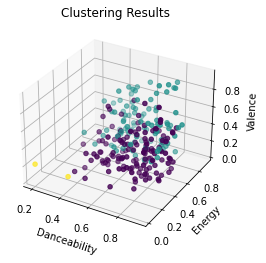

In [1662]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the data points stored in a variable called 'data'
# Assuming you have the assigned cluster labels stored in a variable called 'labels'

# Extract the feature values for plotting
x = data['Danceability']
y = data['Energy']
z = data['Valence']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=cluster_labels, cmap='viridis')

# Add labels and title
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.title('Clustering Results')

# Show the plot
plt.show()


In [1631]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = ohe.drop('Label', axis=1)
y = ohe['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = knn.predict(X_test_scaled)


from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

         SUV       0.00      0.00      0.00       1.0
       Sedan       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [1632]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
cm 

array([[0, 1],
       [1, 0]])

In [1320]:
cas = requests.get("https://overfast-api.tekrop.fr/players?name=Veilance")

cas.status_code

200

In [1321]:
veilance_data = cas.json()


player_id = veilance_data['results'][0]['player_id']


In [1322]:
player_id

'Veilance-1532'

In [1324]:
veil = requests.get(f"https://overfast-api.tekrop.fr/players/{player_id}/stats/summary")

veil.status_code

200

In [1325]:
veil.json()

{'general': {'games_played': 123,
  'time_played': 81593,
  'winrate': 56.1,
  'kda': 3.68,
  'total': {'eliminations': 3291,
   'assists': 27,
   'deaths': 901,
   'damage': 1706602,
   'healing': 29595},
  'average': {'eliminations': 24.2,
   'assists': 0.2,
   'deaths': 6.63,
   'damage': 12549.62,
   'healing': 217.63}},
 'roles': {'tank': {'games_played': 6,
   'time_played': 3709,
   'winrate': 100.0,
   'kda': 8.74,
   'total': {'eliminations': 174,
    'assists': 27,
    'deaths': 23,
    'damage': 97778,
    'healing': 0},
   'average': {'eliminations': 28.15,
    'assists': 4.37,
    'deaths': 3.72,
    'damage': 15817.42,
    'healing': 0.0}},
  'damage': {'games_played': 117,
   'time_played': 77884,
   'winrate': 53.85,
   'kda': 3.55,
   'total': {'eliminations': 3117,
    'assists': 0,
    'deaths': 878,
    'damage': 1608824,
    'healing': 29595},
   'average': {'eliminations': 24.01,
    'assists': 0.0,
    'deaths': 6.76,
    'damage': 12394.0,
    'healing': 227.99}

In [1326]:
t = requests.get(f"https://overfast-api.tekrop.fr/players/{player_id}").json()

t

{'summary': {'username': 'Veilance',
  'avatar': 'https://d15f34w2p8l1cc.cloudfront.net/overwatch/a3d0137926328df8535d59f7f9f1cf1762e2e74e54127bc8342007fbe8ad0f2c.png',
  'namecard': 'https://d15f34w2p8l1cc.cloudfront.net/overwatch/547afad62e63b9c6147741b1450cea6a97983ca3bc7b53514561ea98973818b0.png',
  'title': 'Nomad',
  'endorsement': {'level': 2,
   'frame': 'https://static.playoverwatch.com/img/pages/career/icons/endorsement/2-8b9f0faa25.svg#icon'},
  'competitive': None,
  'privacy': 'public'},
 'stats': {'pc': None,
  'console': {'quickplay': {'heroes_comparisons': {'time_played': {'label': 'Time Played',
      'values': [{'hero': 'echo', 'value': 1244},
       {'hero': 'soldier-76', 'value': 1237},
       {'hero': 'reaper', 'value': 789},
       {'hero': 'ashe', 'value': 471},
       {'hero': 'lucio', 'value': 458},
       {'hero': 'mercy', 'value': 28},
       {'hero': 'junkrat', 'value': 19}]},
     'games_won': {'label': 'Games Won',
      'values': [{'hero': 'soldier-76', '

In [1340]:
overwatch_df = pd.DataFrame(t['stats']['console']['quickplay']['heroes_comparisons']['time_played']['values'])

overwatch_df

,hero,value
0,echo,1244
1,soldier-76,1237
2,reaper,789
3,ashe,471
4,lucio,458
5,mercy,28
6,junkrat,19
